   User_ID  Gender  Age  EstimatedSalary  Purchased
0        1  Female   54            26000          1
1        2  Female   57            26000          1
2        3    Male   52           150000          1
3        4  Female   35            50000          0
4        5  Female   39            59000          0

Accuracy Score :  0.92


/tmp/ipykernel_3014/2062325748.py:55: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])


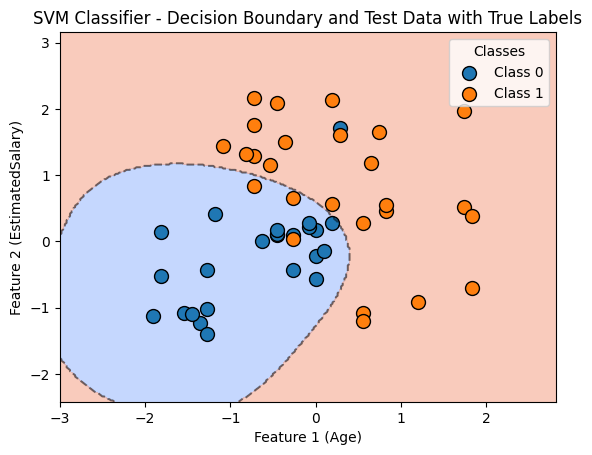

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data=pd.read_csv('social_network_ads.csv')
print(data.head())

#data.groupby('Gender').Purchased.mean().plot(kind='bar')
#data.groupby('Age').Purchased.mean().plot(kind='line')


X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel = 'rbf',C=1, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

ac=accuracy_score(y_test,y_pred)
print("\nAccuracy Score : ",ac)


#user_age = float(input("\nEnter your age: "))
#user_salary = float(input("Enter your estimated salary: "))
#user_input_scaled = sc.transform([[user_age, user_salary]])
#user_prediction = classifier.predict(user_input_scaled)
#print("\nPredicted Class:", user_prediction[0])
#if user_prediction[0]==0:
 #   print("Not Target customer")
#else:
 #   print("Target customer")

# Visualizing the results using scatter plot, hyperplane, separator, and class labels
# Plot the decision boundary (hyperplane)
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
# Plot the support vectors

#scatter=plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=100, label='True Labels')
#plt.scatter(user_input_scaled[:, 0], user_input_scaled[:, 1], marker='x', color='green', label=f'Predicted Class {user_prediction[0]}', s=200)
#plt.legend(*scatter.legend_elements(), title="Classes")
for class_label in np.unique(y_test):
    class_data = X_test[y_test == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', s=100, edgecolors='k')
#plt.scatter(user_input_scaled[:, 0], user_input_scaled[:, 1], marker='x', color='green', label=f'Predicted Class {user_prediction[0]}', s=200)
plt.title('SVM Classifier - Decision Boundary and Test Data with True Labels')
plt.xlabel('Feature 1 (Age)')
plt.ylabel('Feature 2 (EstimatedSalary)')
plt.legend(title="Classes")
plt.show()
